# Task

### - Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.

# Import Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

#import tick 
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# list of named time zones
import pytz

# import the statsmodels time series analysis api module
import statsmodels.tsa.api as tsa


from scipy.signal import find_peaks

import holidays
import datetime as dt
from holidays import country_holidays

import glob
import warnings
warnings.filterwarnings('ignore')

# Load Data/Combine

In [84]:
q = 'Data/Chicago/Chicago-Crime_*.csv'
combined_files = glob.glob(q)
combined_files

['Data/Chicago/Chicago-Crime_2019.csv',
 'Data/Chicago/Chicago-Crime_2018.csv',
 'Data/Chicago/Chicago-Crime_2008.csv',
 'Data/Chicago/Chicago-Crime_2020.csv',
 'Data/Chicago/Chicago-Crime_2021.csv',
 'Data/Chicago/Chicago-Crime_2009.csv',
 'Data/Chicago/Chicago-Crime_2023.csv',
 'Data/Chicago/Chicago-Crime_2022.csv',
 'Data/Chicago/Chicago-Crime_2007.csv',
 'Data/Chicago/Chicago-Crime_2013.csv',
 'Data/Chicago/Chicago-Crime_2012.csv',
 'Data/Chicago/Chicago-Crime_2006.csv',
 'Data/Chicago/Chicago-Crime_2010.csv',
 'Data/Chicago/Chicago-Crime_2004.csv',
 'Data/Chicago/Chicago-Crime_2005.csv',
 'Data/Chicago/Chicago-Crime_2011.csv',
 'Data/Chicago/Chicago-Crime_2015.csv',
 'Data/Chicago/Chicago-Crime_2001.csv',
 'Data/Chicago/Chicago-Crime_2014.csv',
 'Data/Chicago/Chicago-Crime_2002.csv',
 'Data/Chicago/Chicago-Crime_2016.csv',
 'Data/Chicago/Chicago-Crime_2017.csv',
 'Data/Chicago/Chicago-Crime_2003.csv']

In [85]:
## Loading and Concatenating the list of dfs with 1 line
df_combined = pd.concat([pd.read_csv(file, index_col=0) for file in combined_files])
df_combined

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
ID,,,,,,,,,,,,,,,,,,,
11559645,01/01/2019 01:00:00 AM,THEFT,FROM BUILDING,APARTMENT,False,False,1434,14.0,32.0,41.916147,-87.686374,24.0,22535.0,23.0,373.0,40.0,1.0,7.0,192.0
11630297,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,41.941776,-87.651479,38.0,4449.0,57.0,731.0,25.0,22.0,5.0,28.0
12149675,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,41.751612,-87.671958,6.0,21554.0,70.0,573.0,31.0,59.0,20.0,231.0
11560428,01/01/2019 01:00:00 AM,THEFT,FROM BUILDING,RESTAURANT,False,False,1832,18.0,42.0,41.893677,-87.631177,22.0,4446.0,37.0,670.0,36.0,55.0,14.0,72.0
12244301,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,614,6.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116762,12/31/2003 12:50:12 PM,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1423,14.0,26.0,41.905026,-87.692003,10.0,21560.0,25.0,302.0,49.0,4.0,7.0,62.0
3112374,12/31/2003 12:55:00 AM,PUBLIC PEACE VIOLATION,FALSE POLICE REPORT,STREET,False,False,2234,22.0,34.0,41.684928,-87.653656,45.0,22212.0,74.0,663.0,22.0,13.0,9.0,263.0
3121312,12/31/2003 12:55:00 PM,MOTOR VEHICLE THEFT,"ATT: TRUCK, BUS, MOTOR HOME",STREET,False,False,1131,11.0,24.0,41.875043,-87.743319,36.0,22216.0,26.0,69.0,14.0,32.0,16.0,143.0


In [86]:
df = df_combined.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7854582 entries, 11559645 to 3117261
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Date                        object 
 1   Primary Type                object 
 2   Description                 object 
 3   Location Description        object 
 4   Arrest                      bool   
 5   Domestic                    bool   
 6   Beat                        int64  
 7   District                    float64
 8   Ward                        float64
 9   Latitude                    float64
 10  Longitude                   float64
 11  Historical Wards 2003-2015  float64
 12  Zip Codes                   float64
 13  Community Areas             float64
 14  Census Tracts               float64
 15  Wards                       float64
 16  Boundaries - ZIP Codes      float64
 17  Police Districts            float64
 18  Police Beats                float64
dtypes: bool(2), fl

In [87]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

# Clean/Refine Data

In [88]:
# display head of data
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
ID,,,,,,,,,,,,,,,,,,,
11559645,01/01/2019 01:00:00 AM,THEFT,FROM BUILDING,APARTMENT,False,False,1434,14.0,32.0,41.916147,-87.686374,24.0,22535.0,23.0,373.0,40.0,1.0,7.0,192.0
11630297,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,41.941776,-87.651479,38.0,4449.0,57.0,731.0,25.0,22.0,5.0,28.0
12149675,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,41.751612,-87.671958,6.0,21554.0,70.0,573.0,31.0,59.0,20.0,231.0
11560428,01/01/2019 01:00:00 AM,THEFT,FROM BUILDING,RESTAURANT,False,False,1832,18.0,42.0,41.893677,-87.631177,22.0,4446.0,37.0,670.0,36.0,55.0,14.0,72.0
12244301,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,614,6.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# Convert 'Date' to datetime dtype
fmt = '%m/%d/%Y %I:%M:%S %p'

In [90]:
df['Datetime'] = pd.to_datetime(df['Date'], format=fmt)

In [91]:
# display new datetime format
df.head(3)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Datetime
ID,,,,,,,,,,,,,,,,,,,,
11559645,01/01/2019 01:00:00 AM,THEFT,FROM BUILDING,APARTMENT,False,False,1434,14.0,32.0,41.916147,-87.686374,24.0,22535.0,23.0,373.0,40.0,1.0,7.0,192.0,2019-01-01 01:00:00
11630297,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,41.941776,-87.651479,38.0,4449.0,57.0,731.0,25.0,22.0,5.0,28.0,2019-01-01 13:00:00
12149675,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,41.751612,-87.671958,6.0,21554.0,70.0,573.0,31.0,59.0,20.0,231.0,2019-01-01 13:00:00


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7854582 entries, 11559645 to 3117261
Data columns (total 20 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Date                        object        
 1   Primary Type                object        
 2   Description                 object        
 3   Location Description        object        
 4   Arrest                      bool          
 5   Domestic                    bool          
 6   Beat                        int64         
 7   District                    float64       
 8   Ward                        float64       
 9   Latitude                    float64       
 10  Longitude                   float64       
 11  Historical Wards 2003-2015  float64       
 12  Zip Codes                   float64       
 13  Community Areas             float64       
 14  Census Tracts               float64       
 15  Wards                       float64       
 16  Boundaries 

## Make "Datetime" Index

In [93]:
df = df.set_index('Datetime')
df.head(2)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
Datetime,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,01/01/2019 01:00:00 AM,THEFT,FROM BUILDING,APARTMENT,False,False,1434,14.0,32.0,41.916147,-87.686374,24.0,22535.0,23.0,373.0,40.0,1.0,7.0,192.0
2019-01-01 13:00:00,01/01/2019 01:00:00 PM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,41.941776,-87.651479,38.0,4449.0,57.0,731.0,25.0,22.0,5.0,28.0


In [94]:
# drop unnecessary columns
df.drop(columns=['Latitude', 'Longitude', 'Date'], inplace=True)
df.head(2)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
Datetime,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,THEFT,FROM BUILDING,APARTMENT,False,False,1434,14.0,32.0,24.0,22535.0,23.0,373.0,40.0,1.0,7.0,192.0
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,38.0,4449.0,57.0,731.0,25.0,22.0,5.0,28.0


### Rename 'CRIM SEXUAL ASSAULT' to 'CRIMINAL SEXUAL ASSAULT'

In [95]:
df['Primary Type'].value_counts().index.sort_values()

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object')

In [96]:
df['Primary Type'] = df['Primary Type'].replace({'CRIM SEXUAL ASSAULT': 'CRIMINAL SEXUAL ASSAULT'})

In [97]:
df['Primary Type'].value_counts().index.sort_values()

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIMINAL DAMAGE',
       'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object')

# 1) Comparing Police Districts

### - Which district has the most crimes?
### - Which district has the least?

In [98]:
print(df['Primary Type'].unique())
len(df['Primary Type'].unique())

['THEFT' 'DECEPTIVE PRACTICE' 'ASSAULT' 'CRIMINAL DAMAGE' 'BATTERY'
 'CRIMINAL SEXUAL ASSAULT' 'BURGLARY' 'WEAPONS VIOLATION' 'NARCOTICS'
 'LIQUOR LAW VIOLATION' 'OTHER OFFENSE' 'ROBBERY' 'SEX OFFENSE'
 'CRIMINAL TRESPASS' 'MOTOR VEHICLE THEFT' 'INTIMIDATION'
 'OFFENSE INVOLVING CHILDREN' 'INTERFERENCE WITH PUBLIC OFFICER'
 'PUBLIC PEACE VIOLATION' 'KIDNAPPING' 'PROSTITUTION' 'STALKING' 'ARSON'
 'CONCEALED CARRY LICENSE VIOLATION' 'HOMICIDE' 'HUMAN TRAFFICKING'
 'OBSCENITY' 'GAMBLING' 'NON-CRIMINAL' 'OTHER NARCOTIC VIOLATION'
 'PUBLIC INDECENCY' 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'RITUALISM'
 'NON - CRIMINAL' 'DOMESTIC VIOLENCE']


35

### Remove 'NON-CRIMINAL' 

In [99]:
no_crime = df['Primary Type'].str.startswith('NON')

In [100]:
df_copy = df[~no_crime]
df_copy

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
Datetime,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,THEFT,FROM BUILDING,APARTMENT,False,False,1434,14.0,32.0,24.0,22535.0,23.0,373.0,40.0,1.0,7.0,192.0
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,38.0,4449.0,57.0,731.0,25.0,22.0,5.0,28.0
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,6.0,21554.0,70.0,573.0,31.0,59.0,20.0,231.0
2019-01-01 01:00:00,THEFT,FROM BUILDING,RESTAURANT,False,False,1832,18.0,42.0,22.0,4446.0,37.0,670.0,36.0,55.0,14.0,72.0
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,614,6.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-12-31 12:50:12,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1423,14.0,26.0,10.0,21560.0,25.0,302.0,49.0,4.0,7.0,62.0
2003-12-31 00:55:00,PUBLIC PEACE VIOLATION,FALSE POLICE REPORT,STREET,False,False,2234,22.0,34.0,45.0,22212.0,74.0,663.0,22.0,13.0,9.0,263.0
2003-12-31 12:55:00,MOTOR VEHICLE THEFT,"ATT: TRUCK, BUS, MOTOR HOME",STREET,False,False,1131,11.0,24.0,36.0,22216.0,26.0,69.0,14.0,32.0,16.0,143.0


In [101]:
# check len
len(df_copy['Primary Type'].unique())

32

In [102]:
# display counts of districts
plot_1 = df_copy['District'].value_counts().sort_values()
plot_1

21.0         4
31.0       246
20.0    139050
17.0    226662
24.0    237548
22.0    257326
16.0    263050
14.0    303716
1.0     318286
15.0    336054
10.0    338457
5.0     347771
18.0    352684
19.0    353093
2.0     372159
9.0     383510
12.0    389713
3.0     398337
4.0     445972
25.0    446610
7.0     453395
6.0     459381
11.0    503728
8.0     527553
Name: District, dtype: int64

In [103]:
# get sum of values
plot_1.values.sum()

7854305

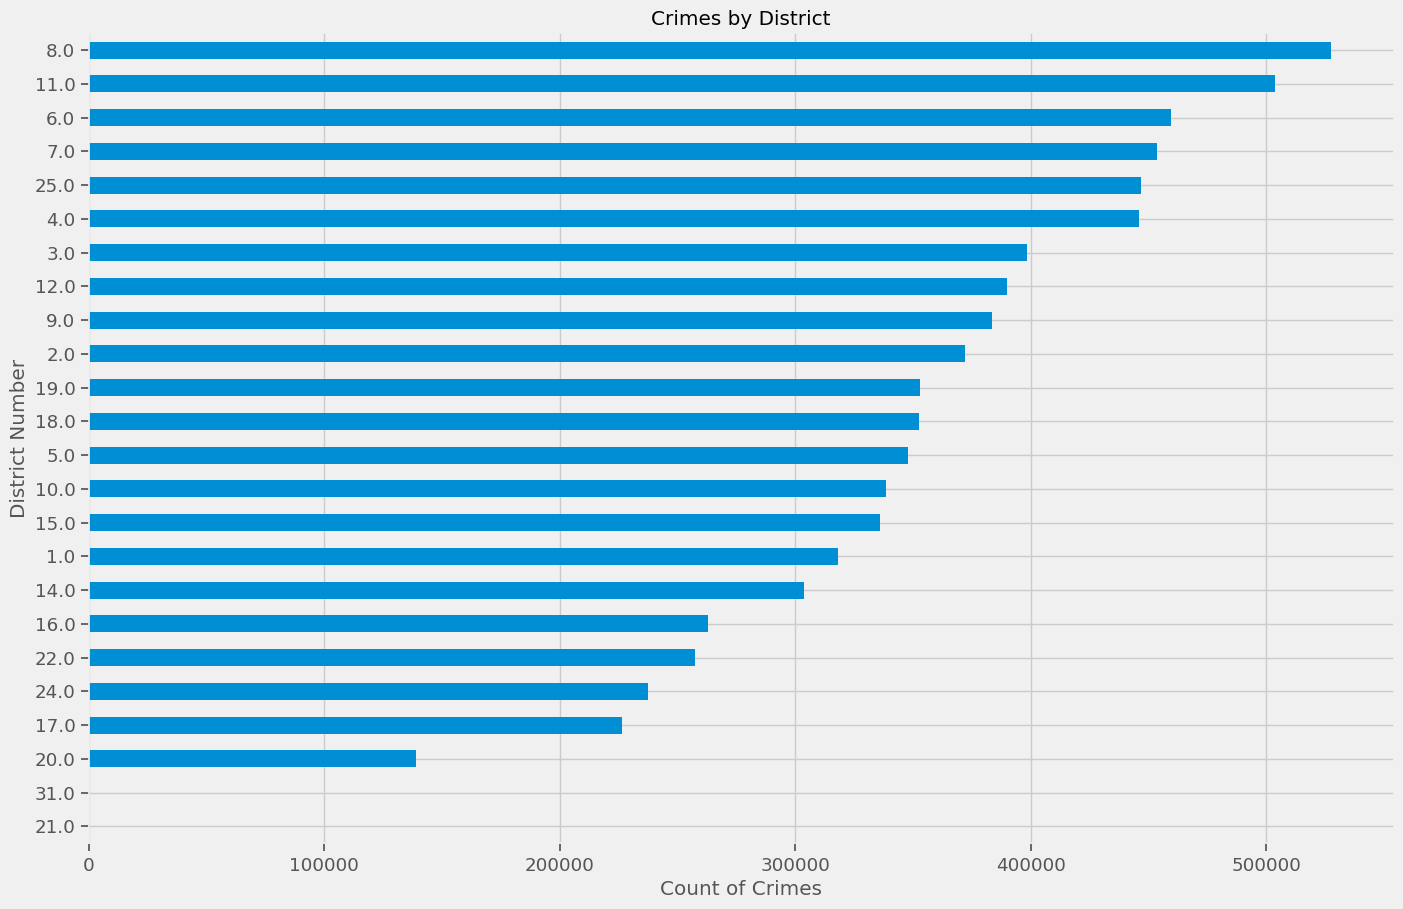

In [104]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_1.plot(kind='barh')

plt.xlabel('Count of Crimes')
plt.ylabel('District Number')
plt.title('Crimes by District');

# Answers:

## 1) Which District has the most crime?

  - District 8: 527,553
  
## 2) Which has the least?

   - District 21: 4

# 2) Crimes Across The Years:

### - Is the total number of crimes increasing or decreasing across the years?


### - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

## Are Crimes Increasing or Decreasing Across the Years?

In [105]:
df2 = df[~no_crime]

In [106]:
df2['Year'] = df2.index.year

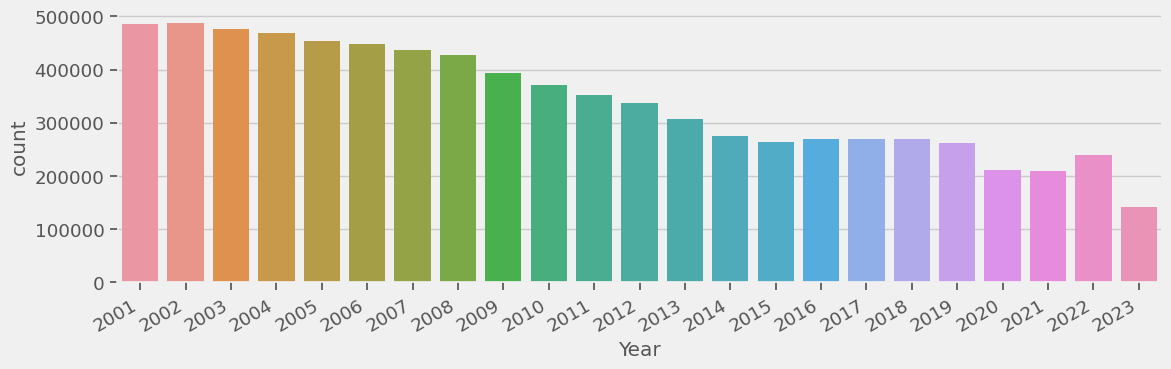

In [107]:
# plot/visualize years
ax = sns.countplot(data=df2, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

In [108]:
df2['Year'].value_counts().sort_index(ascending = False)

2023    142000
2022    238731
2021    208755
2020    212175
2019    261289
2018    268777
2017    269059
2016    269758
2015    264741
2014    275721
2013    307472
2012    336268
2011    351975
2010    370504
2009    392825
2008    427169
2007    437087
2006    448179
2005    453772
2004    469421
2003    475983
2002    486806
2001    485885
Name: Year, dtype: int64

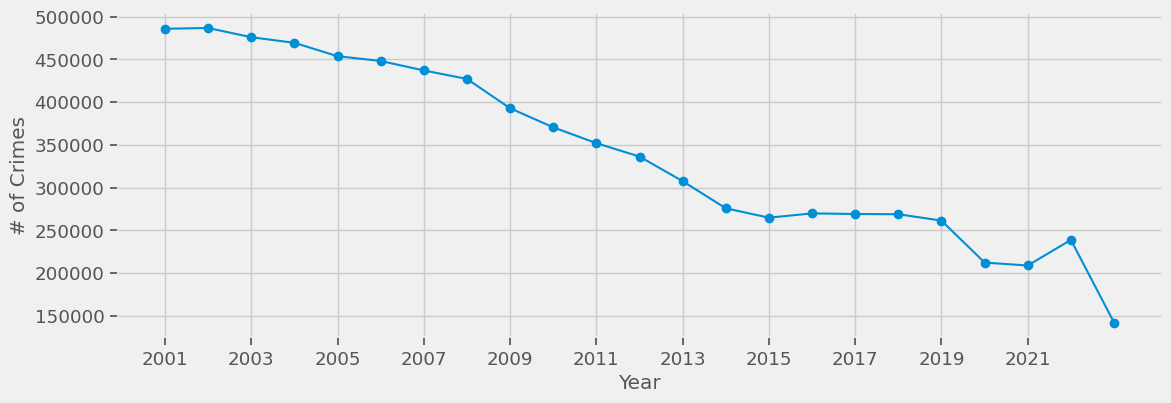

In [109]:
# save year counts
year_counts = df2['Year'].value_counts().sort_index()
year_counts.plot(style='o-',grid=True,ylabel='# of Crimes', xlabel='Year')

plt.xticks(np.arange(2001, 2023, step=2));

## Any Crimes Going Against the Overall Trend?

In [110]:
df2

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Year
Datetime,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,THEFT,FROM BUILDING,APARTMENT,False,False,1434,14.0,32.0,24.0,22535.0,23.0,373.0,40.0,1.0,7.0,192.0,2019
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,38.0,4449.0,57.0,731.0,25.0,22.0,5.0,28.0,2019
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,6.0,21554.0,70.0,573.0,31.0,59.0,20.0,231.0,2019
2019-01-01 01:00:00,THEFT,FROM BUILDING,RESTAURANT,False,False,1832,18.0,42.0,22.0,4446.0,37.0,670.0,36.0,55.0,14.0,72.0,2019
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,614,6.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003-12-31 12:50:12,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1423,14.0,26.0,10.0,21560.0,25.0,302.0,49.0,4.0,7.0,62.0,2003
2003-12-31 00:55:00,PUBLIC PEACE VIOLATION,FALSE POLICE REPORT,STREET,False,False,2234,22.0,34.0,45.0,22212.0,74.0,663.0,22.0,13.0,9.0,263.0,2003
2003-12-31 12:55:00,MOTOR VEHICLE THEFT,"ATT: TRUCK, BUS, MOTOR HOME",STREET,False,False,1131,11.0,24.0,36.0,22216.0,26.0,69.0,14.0,32.0,16.0,143.0,2003


In [111]:
plot_type = df2.groupby('Primary Type').resample('M').size()

In [112]:
plot_type = plot_type.unstack().T
plot_type

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-31,67.0,2123.0,6527.0,1934.0,NaN,3966.0,165.0,1192.0,1398.0,1.0,44.0,42.0,NaN,36.0,18.0,75.0,101.0,2097.0,4714.0,2.0,246.0,1.0,2800.0,563.0,NaN,161.0,2.0,1396.0,218.0,26.0,7867.0,337.0
2001-02-28,57.0,2029.0,6042.0,1666.0,NaN,3665.0,135.0,1063.0,1163.0,NaN,37.0,27.0,NaN,27.0,24.0,57.0,109.0,1785.0,4369.0,1.0,152.0,0.0,2488.0,426.0,1.0,173.0,0.0,1159.0,149.0,13.0,6669.0,301.0
2001-03-31,93.0,2824.0,7662.0,1832.0,NaN,4617.0,153.0,1141.0,1313.0,NaN,55.0,37.0,NaN,22.0,22.0,72.0,147.0,2151.0,4862.0,2.0,195.0,0.0,2836.0,550.0,0.0,267.0,2.0,1399.0,184.0,17.0,7766.0,345.0
2001-04-30,89.0,2746.0,8328.0,1932.0,NaN,4922.0,134.0,1133.0,1199.0,NaN,79.0,59.0,NaN,34.0,21.0,49.0,164.0,2120.0,4044.0,2.0,196.0,0.0,2483.0,564.0,1.0,229.0,1.0,1341.0,169.0,29.0,7702.0,321.0
2001-05-31,94.0,2903.0,8887.0,1997.0,1.0,4757.0,157.0,1067.0,1261.0,NaN,94.0,42.0,NaN,41.0,25.0,56.0,194.0,2197.0,4038.0,1.0,213.0,2.0,2528.0,503.0,1.0,239.0,1.0,1491.0,227.0,12.0,8420.0,390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31,29.0,1755.0,3404.0,569.0,17.0,2320.0,111.0,440.0,1477.0,NaN,1.0,37.0,2.0,61.0,30.0,6.0,24.0,2320.0,398.0,4.0,152.0,NaN,1395.0,7.0,0.0,66.0,NaN,685.0,102.0,38.0,4445.0,631.0
2023-04-30,36.0,1807.0,3599.0,594.0,12.0,2430.0,121.0,363.0,1397.0,NaN,0.0,55.0,0.0,51.0,20.0,5.0,10.0,2282.0,322.0,2.0,161.0,NaN,1221.0,5.0,0.0,82.0,NaN,752.0,113.0,38.0,4329.0,688.0
2023-05-31,54.0,2013.0,3947.0,611.0,9.0,2579.0,147.0,389.0,1280.0,NaN,0.0,64.0,0.0,45.0,22.0,22.0,19.0,2426.0,332.0,4.0,169.0,NaN,1223.0,5.0,2.0,81.0,NaN,771.0,126.0,40.0,4683.0,821.0


In [113]:
plot_type = plot_type.fillna(0.0)
plot_type.isna().sum().sum()

0

## Set Visualization for Crime Trend

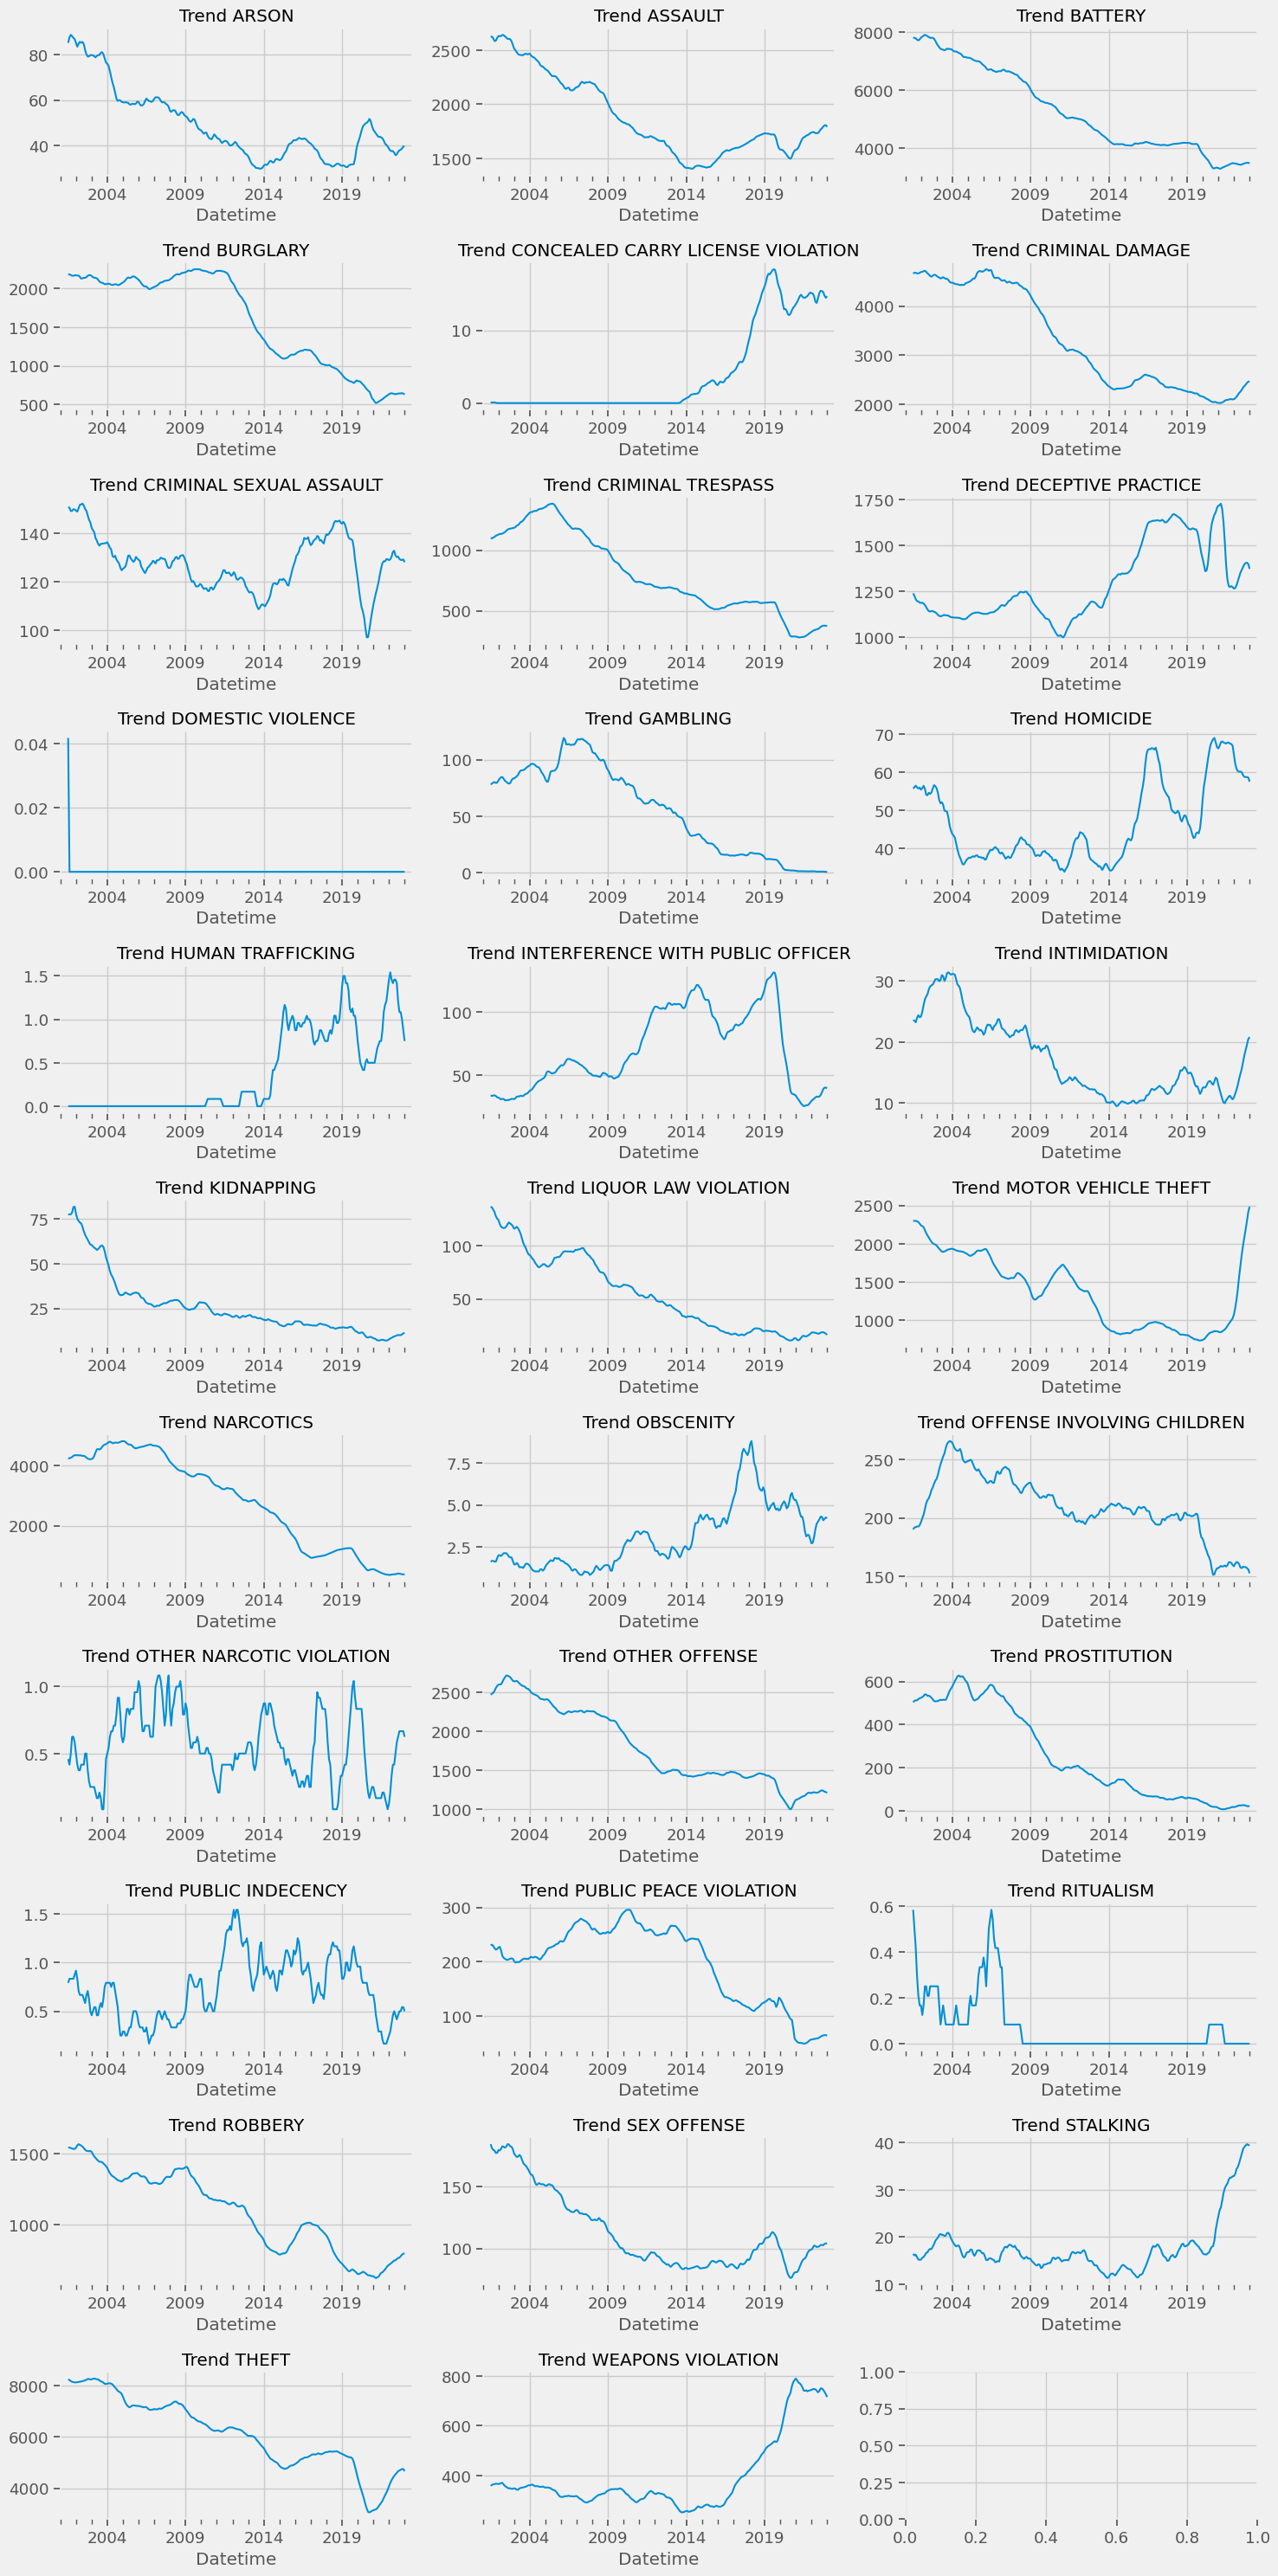

In [114]:
fig, axes = plt.subplots(11, 3, figsize=(15,30))

for indx, crime in enumerate(plot_type.columns):
    row = indx // 3
    col = indx % 3
    ts = plot_type[crime]
    decomp = tsa.seasonal_decompose(ts)
    
    decomp.trend.plot(title=f'{crime} Trend', ax = axes[row, col])
    axes[row, col].set_title(f'Trend {crime}')
plt.tight_layout()

# Answers

### - Is the total number of crimes increasing or decreasing across the years?

- If we look from 2001 to 2023, crime has decreased.

### - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

 There are a few of the specific crimes that have trended upward:

- 'CONCEALED CARRY LICENSE VIOLATION',
- 'CRIMINAL SEXUAL ASSAULT',
- 'HUMAN TRAFFICKING',
- 'OBSCENITY',
- 'STALKING',
- 'WEAPONS VIOLATION'*

# 3) Comparing Months:

### - What months have the most crime? What months have the least?

### - Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [115]:
df3 = df[~no_crime]

In [116]:
df3['Month'] = df3.index.month
df3['MonthName'] = df3.index.month_name()
df3.head(3)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Month,MonthName
Datetime,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,THEFT,FROM BUILDING,APARTMENT,False,False,1434,14.0,32.0,24.0,22535.0,23.0,373.0,40.0,1.0,7.0,192.0,1,January
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,38.0,4449.0,57.0,731.0,25.0,22.0,5.0,28.0,1,January
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,6.0,21554.0,70.0,573.0,31.0,59.0,20.0,231.0,1,January


In [117]:
# saving lookup for number vs name
unique_months = df3.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

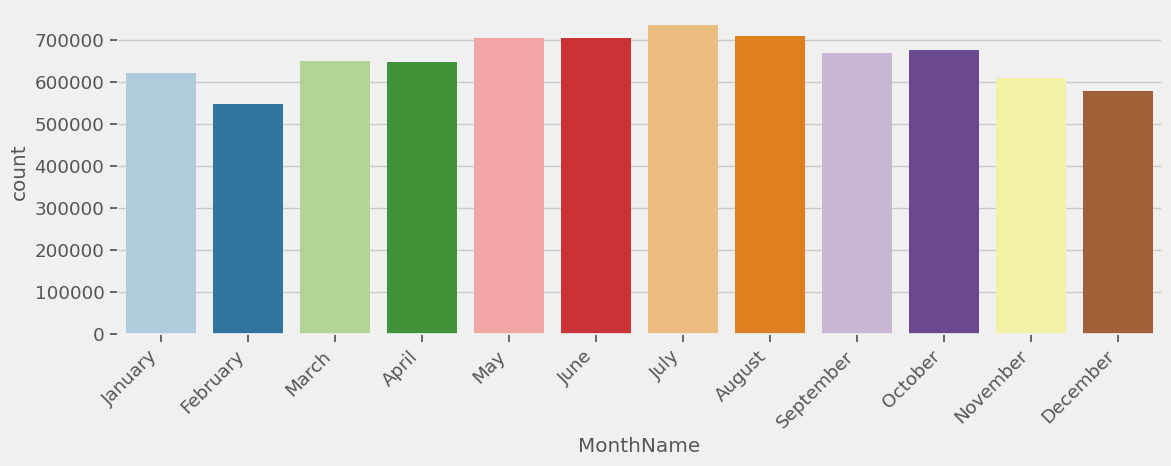

In [118]:
ax = sns.countplot(data=df3, x='MonthName',palette='Paired',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

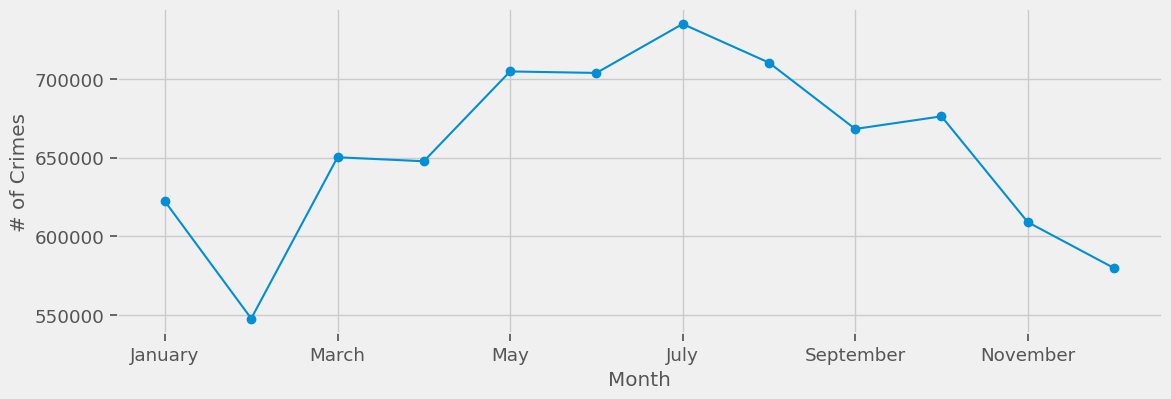

In [120]:
# month_lookup.values() will reorder df['MonthName'].value_counts() by month
month_counts = df3['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

## Answer:

### - What months have the most crime? What months have the least?

  - Most crime occurs during late Spring-Summer months (May to August)

- The least crime occurs during late Fall-Winter months (November to February)

## - Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [121]:
df3.head()

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats,Month,MonthName
Datetime,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,THEFT,FROM BUILDING,APARTMENT,False,False,1434,14.0,32.0,24.0,22535.0,23.0,373.0,40.0,1.0,7.0,192.0,1,January
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,1924,19.0,44.0,38.0,4449.0,57.0,731.0,25.0,22.0,5.0,28.0,1,January
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,611,6.0,17.0,6.0,21554.0,70.0,573.0,31.0,59.0,20.0,231.0,1,January
2019-01-01 01:00:00,THEFT,FROM BUILDING,RESTAURANT,False,False,1832,18.0,42.0,22.0,4446.0,37.0,670.0,36.0,55.0,14.0,72.0,1,January
2019-01-01 13:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,614,6.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,January


In [122]:
plot_type3 = df3.groupby('Primary Type')['Month', 'MonthName'].value_counts().sort_index()
plot_type3

Primary Type       Month  MonthName
ARSON              1      January       963
                   2      February      840
                   3      March        1140
                   4      April        1134
                   5      May          1284
                                       ... 
WEAPONS VIOLATION  8      August       9887
                   9      September    9435
                   10     October      9190
                   11     November     7952
                   12     December     7401
Length: 372, dtype: int64

In [123]:
plot_type3.index

MultiIndex([(            'ARSON',  1,   'January'),
            (            'ARSON',  2,  'February'),
            (            'ARSON',  3,     'March'),
            (            'ARSON',  4,     'April'),
            (            'ARSON',  5,       'May'),
            (            'ARSON',  6,      'June'),
            (            'ARSON',  7,      'July'),
            (            'ARSON',  8,    'August'),
            (            'ARSON',  9, 'September'),
            (            'ARSON', 10,   'October'),
            ...
            ('WEAPONS VIOLATION',  3,     'March'),
            ('WEAPONS VIOLATION',  4,     'April'),
            ('WEAPONS VIOLATION',  5,       'May'),
            ('WEAPONS VIOLATION',  6,      'June'),
            ('WEAPONS VIOLATION',  7,      'July'),
            ('WEAPONS VIOLATION',  8,    'August'),
            ('WEAPONS VIOLATION',  9, 'September'),
            ('WEAPONS VIOLATION', 10,   'October'),
            ('WEAPONS VIOLATION', 11,  'November

In [124]:
plot_type3_df = plot_type3.to_frame('# of Crimes').reset_index()
plot_type3_df

,Primary Type,Month,MonthName,# of Crimes
0,ARSON,1,January,963
1,ARSON,2,February,840
2,ARSON,3,March,1140
3,ARSON,4,April,1134
4,ARSON,5,May,1284
...,...,...,...,...
367,WEAPONS VIOLATION,8,August,9887
368,WEAPONS VIOLATION,9,September,9435
369,WEAPONS VIOLATION,10,October,9190
370,WEAPONS VIOLATION,11,November,7952


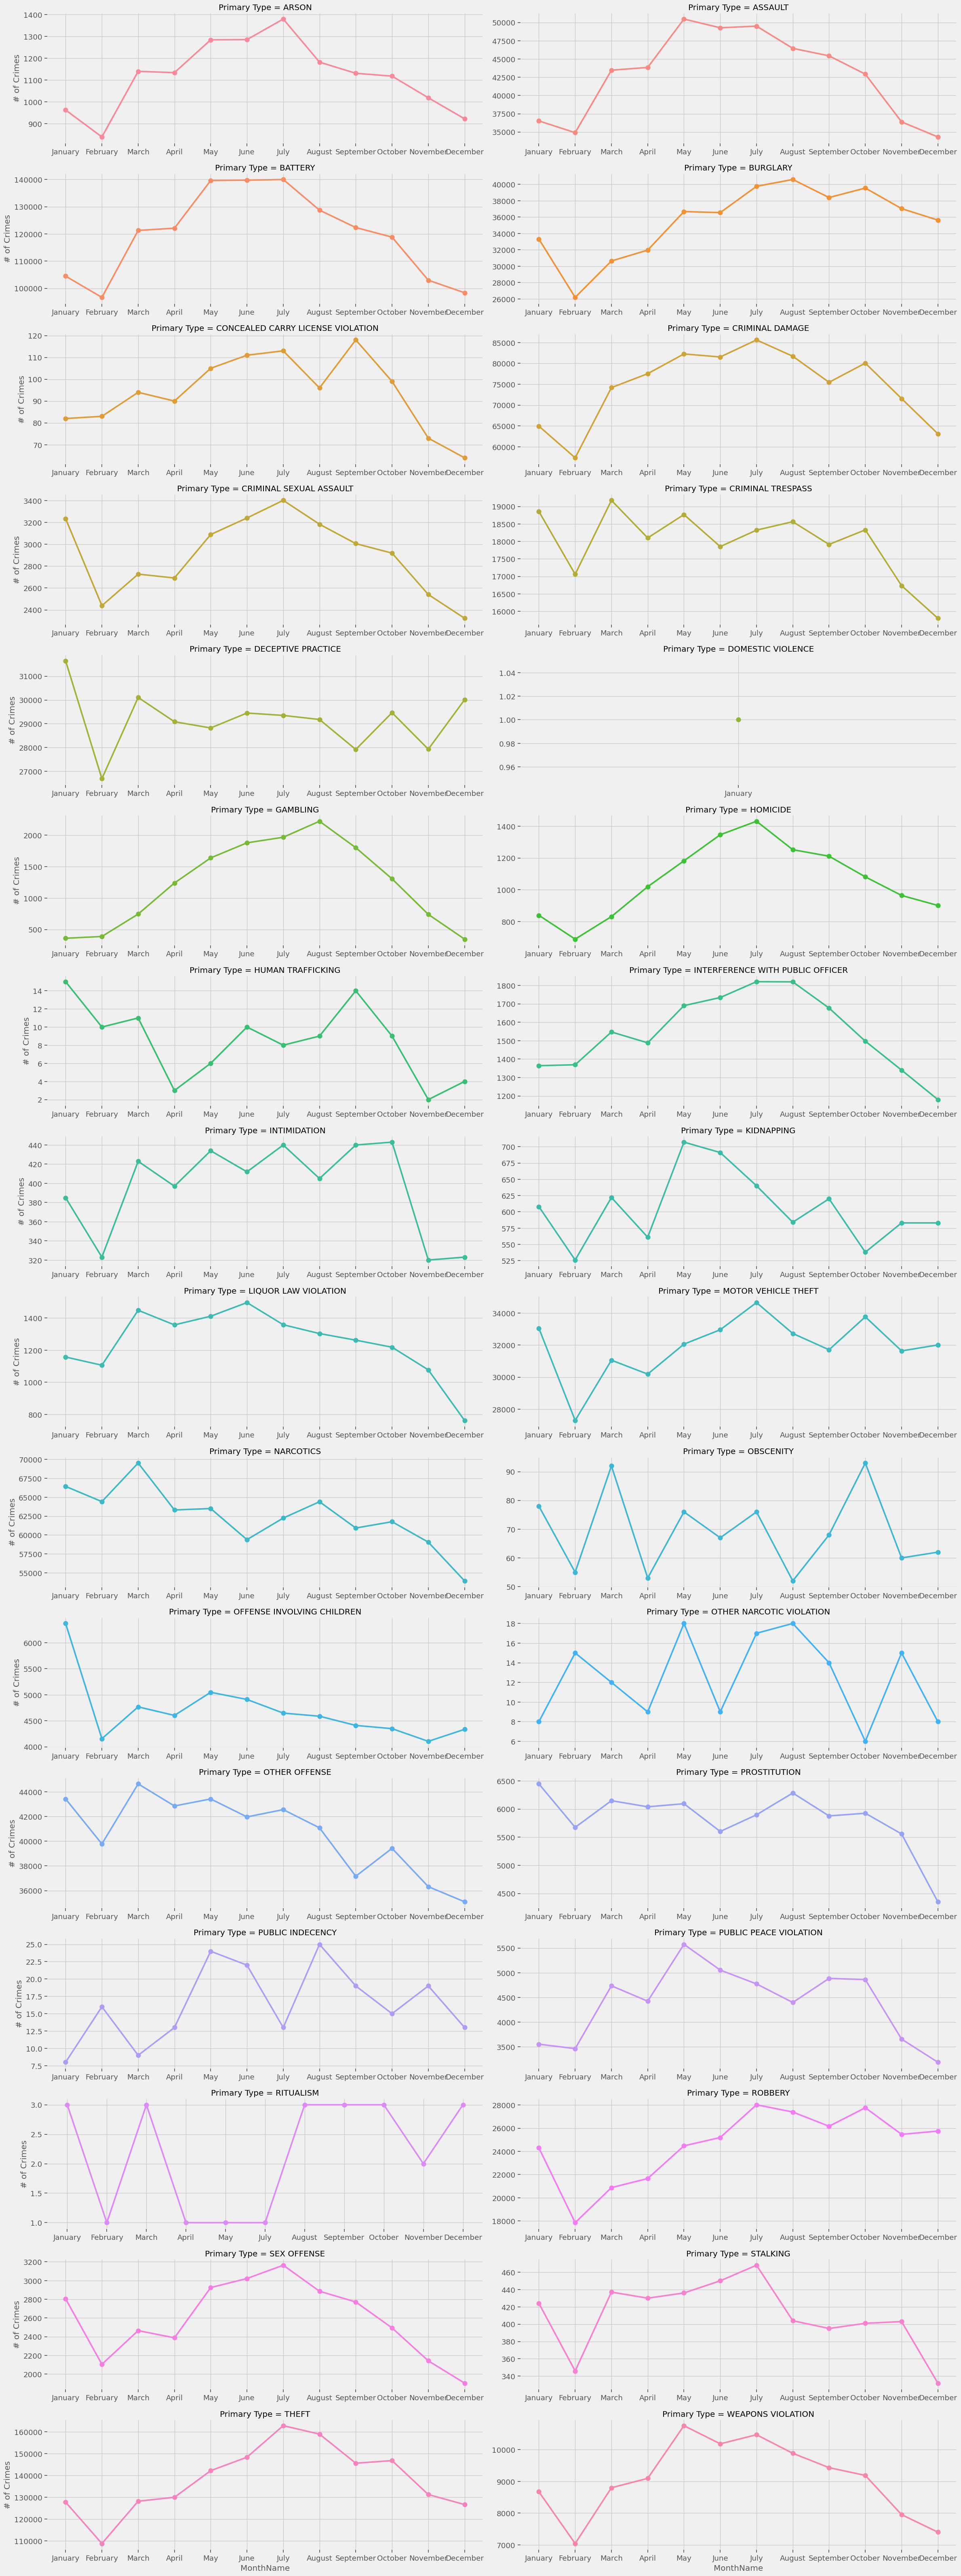

In [126]:
g = sns.catplot(data=plot_type3_df, x='MonthName', y='# of Crimes',
                kind='point',aspect=3, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

## Answer:

 #### Are there any individual crimes that do not follow this pattern? If so, which crimes?

There are some crimes that do not follow the pattern:

- 'DECEPTIVE PRACTICE'
- 'NARCOTICS' 
- 'OBSCENITY'
- 'OFFENSE INVOLVING CHILDREN'
- 'RITUALISM'